In [ ]:
!rm -r /content/sample_data

In [ ]:
%mkdir an_data

In [ ]:
%cd /content/an_data

/content/an_data


In [ ]:
from google.colab import files #Upload the annotated text files from local drive
files.upload()

Saving a.g3qPkC.UM7xF33mZVi5sVpKNDm-1123316.tsv to a.g3qPkC.UM7xF33mZVi5sVpKNDm-1123316.tsv
Saving a_40v3K2FGdNYfaS_6S6Jsri77.C-22635998.tsv to a_40v3K2FGdNYfaS_6S6Jsri77.C-22635998.tsv
Saving a_fUcGCWV_jfoorNEfY9ZLrgTdzy-2310183.tsv to a_fUcGCWV_jfoorNEfY9ZLrgTdzy-2310183.tsv
Saving a_gwKjTrMLtrwW4Ry3U8VFfZu_Lu-14706746.tsv to a_gwKjTrMLtrwW4Ry3U8VFfZu_Lu-14706746.tsv
Saving a_rI55cZbMHdHTM0cNz7wVUGh.YG-15240330.tsv to a_rI55cZbMHdHTM0cNz7wVUGh.YG-15240330.tsv
Saving a0G6qKR9kpJ.vYu5sRpUDK56l3Le-21418495.tsv to a0G6qKR9kpJ.vYu5sRpUDK56l3Le-21418495.tsv
Saving a0VbJUpV5YemaEUU65sXwnHgUeo0-22392141.tsv to a0VbJUpV5YemaEUU65sXwnHgUeo0-22392141.tsv
Saving a1G9_mwl5127bHyxwtrLqRP9Ep.u-20406281.tsv to a1G9_mwl5127bHyxwtrLqRP9Ep.u-20406281.tsv
Saving a1O3245an7NEHwTx7mcFWQNFyto4-22991035.tsv to a1O3245an7NEHwTx7mcFWQNFyto4-22991035.tsv
Saving a1pDgMCNLrLbKkZAlAdRBt2r.59S-28664326.tsv to a1pDgMCNLrLbKkZAlAdRBt2r.59S-28664326.tsv
Saving a2l7vzT6_qWNbgnP8DGLDWCMEgyO-21468717.tsv to a2l7vzT6_qWN

{'a.g3qPkC.UM7xF33mZVi5sVpKNDm-1123316.tsv': b'Pathways for the degradation of m-cresol and p-cresol by Pseudomonas putida.\tO\n\nAbstract\tO\n\nA comparison of the oxidation rates of various compounds by whole cells of Pseudomonas putida 3, 5 indicated that m-cresol is metabolized by oxidation to 3-hydroxybenzoate followed by hydroxylation to gentisate, the ring-fission substrate, when grown with 3, 5-xylenol. However, when m-cresol was the growth substrate, similar experiments suggested a different pathway involving a methyl-substituted catechol, and ring-fission by meta cleavage. Assays of ring-fission enzymes in cell-free extracts confirmed that different pathways are induced by the two growth substrates. 3, 5-Xylenol-grown cells contained high levels of \tO\ngentisate oxygenase\tenzyme\n and only very small amounts of \tO\ncatechol oxygenase\tenzyme\n, whereas gentisate ocygenase could not be detected in m-cresol-grown cells, but levels of \tO\ncatechol oxygenase\tenzyme\n were gr

In [ ]:
import nltk, re, string, unicodedata, inflect, glob, os
import re
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import numpy as np 
import pandas as pd                                 #for data manipulation and analysis
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer 
from nltk.tokenize import RegexpTokenizer
from string import punctuation
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
for dirname, _, filenames in os.walk('/content/an_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/an_data/adFPfP5Za2Tqr7GICnCj4szpgbR0-21974851.tsv
/content/an_data/asarkR8qt4kkCy31TNJmI5eqS0Za-22176786.tsv
/content/an_data/aU.B2YOcXQQ0c__tKQlZmVhxL9.W-24862007.tsv
/content/an_data/azow9xfl_vua1heIv1oyGayw3.CW-1390687.tsv
/content/an_data/alFClOzZRZSztDE_huAmaKx0apz0-19002456.tsv
/content/an_data/aVpYWI_FIBmNF9Q.wYEuetl8lCLi-1444373.tsv
/content/an_data/aKEgV7EueJsNLXQ4_VvYw9dxQ7yu-1453953.tsv
/content/an_data/a19opHP85j5SpAVTkODOJ4LNVwxa-1610174.tsv
/content/an_data/arDLI8bpK.7etpUqvs5jM.I3rNqu-11831474.tsv
/content/an_data/atSqjJMKCyOI03pI2eklLyIFEk7q-1938949.tsv
/content/an_data/aPjCyemv4fUpmXpk7VoVwjyBDs_u-1371658.tsv
/content/an_data/aArRcX1.yw2C779LPKZEQgkPFd5O-1961727.tsv
/content/an_data/aAjTJkYkdurOuzdNS2EqvP8DTTfS-1447132.tsv
/content/an_data/anEWNcuFgnjOgnlsSzzA3t6wyxxm-11319111.tsv
/content/an_data/a64iRnUPdE2jbaKQELV_UNrG2Zxi-1526465.tsv
/content/an_data/aAR7COUYPwWwooLSEEo7umBWUrEC-22003008.tsv
/content/an_data/aD3qB7nGh9V6zv33OQXsumxeJ7OC-1254564.tsv
/conten

In [ ]:
df = pd.concat([pd.read_csv(f, sep = '\t', header = None) for f in glob.glob('*.tsv')], ignore_index = True)#bind the tsv files together in a single file

In [ ]:
%cd /content

/content


In [ ]:
df.to_csv(r'/content/Ner Manually Annotated Data Biodegradation.csv', index = False)#export the big file
#df.sample(10)
df.columns = ['sentence','label']
new_gene = df.loc[df["label"] == "gene"]
new_enzyme = df.loc[df["label"] == "enzyme"]
new_enzyme.sample(10)
new_gene.head()
new_gene.to_csv(r'/content/new_gene.csv', index = False)
new_enzyme.to_csv(r'/content/new_enzyme.csv', index = False)

In [ ]:
with open('manual_sent.txt', 'w') as f:
    for text in df["sentence"].tolist():
        f.write(text + '\n')

In [ ]:
with open("/content/manual_sent.txt", 'rb') as corpus:
  text_ann = corpus.read()

In [ ]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = remove_between_square_brackets(text)
    return text

sample = denoise_text(str(text_ann))
erst = sent_tokenize(str(sample))


NameError: ignored

In [ ]:
no_ab = [x.replace('Abstract', '') for x in erst]

In [ ]:
no_n = [x.replace('\\n', '') for x in no_ab]

In [ ]:
stripped_line = [x.replace('\\x', '') for x in no_n]

In [ ]:
with open('x.txt', 'w') as f:
    f.write('\n'.join([str(i) for i in stripped_line]))

#Manually Import the rest pubmids

In [ ]:
!pip install biopython
!pip install --upgrade biopython
!pip install metapub

     |████████████████████████████████| 2.3MB 3.4MB/s 
Requirement already up-to-date: biopython in /usr/local/lib/python3.6/dist-packages (1.78)
     |████████████████████████████████| 122kB 2.7MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 245kB 8.7MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 4.9MB 9.8MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 337kB 48.0MB/s 
  Created wheel for metapub: filename=metapub-0.5.5-cp36-none-any.whl size=135367 sha256=87f1c7031fc15693a2fdf7c3ce3641521a04523dcc3c85e894a16b0ad2c3d4c0
  Stored in directory: /root/.cache/pip/wheels/af/d9/fc/c2f13edf0a7d0d335a69417183acfb3e08896743a79067cbf3
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl

In [ ]:
import Bio
import metapub
from metapub import PubMedFetcher
from Bio import Entrez
from Bio import SeqIO
from Bio.Entrez import efetch

2020-10-26 14:16:59 d440ac7003db metapub.config[102] WARNING NCBI_API_KEY was not set.


In [ ]:
import pandas as pd

In [ ]:
#pmid = pd.read_csv("/content/only pubmid 799 from ewag.csv",header=None) 
#pmid = pd.read_csv("/content/2010.txt",header=None) 


In [ ]:
#pmid_new = "1261,28917,164247,370573,402103,428664,429687,486138,534956,539824,582241,701200,823841,965633,1133282,1168398,1182155,1239455,1367773,1368960,1444373,1444384,1444407,1444408,1452156,1505868,1510672,1575472,1781678,1793801,1929367,2001359,2123939,2170335,2263224,2268290,2298693,2394686,2505723,2514722,2604392,2604394,2604396,2624462,2646661,2729985,2731664,2737207,2834373,2841671,2925649,2992059,3145715,3146950,3226294,3365392,3415238,3530133,3540965,3542021,3662509,3680850,3700421,3752997,3771566,3804975,3830164,3910748,4026866,4051488,4156169,4209783,4342906,4375963,4404764,4436255,4664939,4850728,5413091,5835946,6089663,6121789,6135576,6305910,6353574,6477516,6616091,6696409,6802804,6835251,6848481,6988382,6989805,7069133,7110159,7125802,7272274,7296411,7326243,7405826,7487007,7487018,7532480,7532644,7534052,7538273,7538275,7574580,7574630,7574646,7592321,7592326,7592382,7612022,7632402,7646049,7710320,7710331,7711909,7727396,7730167,7744052,7751268,7765275,7765737,7765836,7772940,7783002,7815950,7858982,7916690,7944365,7946467,7988892,8002472,8002948,8017910,8042906,8048958,8075807,8085840,8085841,8085913,8117093,8125948,8157614,8168524,8206853,8226631,8250558,8270195,8285665,8285683,8285701,8328809,8336104,8368838,8407823,8434923,8439154,8489738,8515237,8555199,8565904,8565920,8572690,8572717,8626335,8626733,8631713,8639525,8639717,8655521,8663199,8695905,8706665,8713712,8795196,8795226,8806731,8824615,8824622,8840783,8863435,8899998,8919798,8919815,8932320,8932698,8953708,9006019,9023182,9023192,9055403,9055410,9056232,9073471,9143136,9148781,9150211,9169427,9171062,9188197,9198535,9212437,9244273,9256235,9288905,9361407,9371430,9371434,9402252,9409151,9422605,9440530,9451829,9461415,9484901,9501443,9531630,9546181,9561822,9563945,9603826,9603860,9603882,9604338,9634856,9665716,9682480,9683644,9687442,9687453,9688819,9699867,9705852,9726864,9726870,9758802,9763695,9782503,9821255,9841126,9880813,9925619,9973345,9990726,10049374,10103224,10192895,10215642,10217752,10224006,10224038,10335583,10336636,10411892,10427042,10427075,10441466,10446355,10460066,10508091,10508110,10515912,10525169,10583970,10600501,10604879,10623604,10633545,10653712,10698765,10698790,10749541,10772893,10788374,10808489,10820337,10831408,10831413,10831416,10831452,10832636,10900221,10919805,10919812,10944230,10959086,10966385,11034277,11073896,11097910,11133961,11282584,11282593,11306561,11321104,11337838,11348688,11371533,11404106,11423945,11426918,11440232,11440239,11455813,11482681,11549020,11573344,11587371,11665835,11679668,11682202,11685377,11693870,11722885,11762605,11763480,11766961,11778869,11823228,11823459,11823863,11839311,11882715,11907679,11944670,11956754,11976120,11990359,11993862,11995829,11999413,12000990,12023110,12039730,12089031,12102310,12107140,12147483,12161433,12164478,12174035,12218011,12228405,12242397,12244065,12324329,12351226,12355460,12411705,12427952,12450835,12450848,12513994,12549541,12570997,12571066,12590478,12620815,12620844,12620885,12632259,12687299,12688722,12713326,12730200,12743754,12805763,12833978,12839810,12867182,12883876,12957929,13806048,14001842,14209949,14342521,14478080,14506256,14527779,14568154,14647941,14669869,14677948,14680704,14711645,14711661,14727088,14766596,14961135,14977550,15080638,15091914,15098544,15110094,15128543,15231844,15240283,15273113,15281945,15315444,15316685,15321683,15361623,15372028,15447630,15466583,15473552,15474469,15500985,15543734,15598525,15647563,15658985,15665329,15672270,15672376,15687214,15699198,15700124,15746326,15750776,15760891,15812056,15843648,15865341,15941012,15979124,16000717,16030198,16085803,16085834,16111779,16145546,16151114,16163345,16187153,16204509,16204529,16233443,16243454,16329975,16345496,16345814,16346423,16346905,16348771,16349484,16412515,16427065,16445897,16445965,16461647,16461673,16507475,16517656,16534956,16535238,16535348,16535398,16535410,16535468,16535618,16549680,16563633,16574137,16580707,16622053,16648861,16672499,16742794,16763020,16841196,16849808,16931750,16934291,16950909,16957226,16980937,16997975,17009088,17016919,17085566,17090129,17091564,17202126,17240021,17252313,17258288,17289112,17304854,17337538,17337569,17369338,17425111,17425661,17462710,17464070,17526790,17533847,17557840,17616586,17618314,17686653,17694301,17886831,17896475,17988770,18024680,18043610,18044507,18216259,18279154,18281429,18340342,18421421,18433838,18456849,18469402,18497127,18556047,18658270,18713663,18778066,18783436,18785261,18800500,18848727,18922538,18970297,19089711,19112598,19124147,19167225,19195880,19209591,19245937,19401257,19413758,19447909,19543983,19557131,19713216,19748650,19767608,19853000,19913277,19915037,19960233,19996699,20038686,20047908,20081004,20092304,20108960,20163824,20226496,20228105,20383655,20452977,20660314,20692015,20799730,20800877,20802076,20830905,20833408,21133989,21204875,21212954,21219563,21219945,21253602,21388176,21573924,21964329,22004107,22115096,22209399,22296107,22300554,22306910,22374299,22447387,22583809,22723250,22828319,22865078,22913282,23029440,23066709,23124226,23144139,23347633,23562951,23670436,23815758,23950532,24028318,24062165,24075675,24194418,24317077,24394371,24410802,24508567,24525259,24589366,24594486,24595746,24615381,24791707,24846567,24863891,24866947,24915506,24974362,25017637,25092626,25104219,25135154,25165005,25273229,25321868,25472689,25497426,25532770,25538691,25581482,25626903,25765521,25782024,25817583,25874375,26009808,26125500,26254065,26526541,26582924,26595099,26646979,26714290,26766391,26822473,26914145,27148185,27316957,27558781,27734123,27825829,27866739,27900688,28214125,28215046,28616645,28651047,28806704,29056410,29207531,29215190,29478141,29773745,29894929,29915565,29979756,30051563,30267917,30918626,31400112,87194560,93170297,94190123,95344182,97144512,31563105,31430718,31398235,31351302,31026607,30986386,30216889,30096573,30086528,30077934,30048950,30048949,29696449,29502248,29421353,29383556,29339611,29273268,29102172,29054658,29052043,28577026,28333043,28243605,27285383,26679048,19806743,19546002,23777790,23647119,24349276,10089289,23894087,23361126,23212173"

In [ ]:
pmid_new = "18558420,18572528,18575116,18581266,18585754,18589972,18597879,18599290,18663415,18682902,18722001,18723282,18763510,18763513,18803113,18822774,18828388,18848715,18848724,18853803,18956741,18957759,18990419,19017114,19046757,19059774,19070346,19070485,19091385,19091530,19091554,19097884,19097885,19111459,19117752,19120628,19125578,19143339,19143346,19156364,19156367,19162294,19186827,19191667,19192786,19192795,19213436,19238968,19301130,19303625,19395246,19402419,19423337,19427015,19468841,19468842,19496634,19501506,19517253,19520412,19534135,19534152,19540106,19540107,19541478,19543983,19564104,19590954,19596135,19618207,19629577,19683433,19692228,19692233,19692235,19713104,19717238,19748180,19762136,19775077,19799291,19827495,19833487,19838810,19844057,19882357,19906398,19941033,19999997,19999999,20004093,20015639,20015643,20018508,20022490,20031399,20047830,20053551,20053552,20053555,20056417,20056513,20071164,20074942,20092890,20127144,20129094,20149964,20153634,20153961,20156640,20156677,20156678,20156685,20176940,20185158,20188540,20204468,20206309,20218541,20229281,20230031,20306326,20383654,20407917,20427070,20451949,20452106,20454836,20457514,20457515,20462625,20471827,20472733,20476735,20486009,20494396,20496937,20512725,20566284,20566285,20567940,20570314,20576562,20584598,20591653,20594822,20594824,20603870,20608501,20619640,20623265,20633920,20638703,20655745,20656478,20659749,20667718,20673716,20708388,20713308,20714920,20716485,20719501,20728345,20728349,20734624,20734628,20734630,20734632,20734633,20734910,20734913,20734915,20734916,20832263,20843682,20855194,20862751,20863693,20863694,20863700,20884049,2090305,20926291,20933400,20933401,20934327,20935362,20951579,20951580,20952191,20964580,20964581,21036601,21052863,21058948,21068394,21077224,21087842,21095246,21113668,21130906,21131017,21166273,21166291,21166292,21168535,21171163,21183198,21185620,21186041,21187171,21196117,21208798,21216096,21232782,21232935,21251818,21252001,21252436,21254383,21279894,21296413,21310479,21320751,21324508,21330709,21368207,21375290,21417712,21423734,21423751,21462703,21465644,21473279,21476351,21482429,21482463,21505709,21509933,21514997,21531131,21548136,21550234,21550800,21565491,21568316,21571105,21571528,21598788,21598794,21601018,21604378,21612916,21637824,21641030,21647688,21678910,21706776,21712105,21723341,21723652,21735162,21743993,21744850,21755293,21757034,21790056,21800120,21807039,21809019,21822953,21824771,21826608,21842206,21850504,21861477,21868217,21870159,21890166,21890340,21890348,21893412,21896750,21902607,21907404,21907571,21924755,21924893,21925876,21933017,21937223,21937224,21940031,21944284,21945162,21950119,21955876,21963281,21972223,21972498,21972500,21972512,21972515,21972521,21974888,21992611,21996479,22001058,22019268,22021186,22030247,22033308,22042691,22044603,22047658,22050507,22051550,22078227,22113456,22137272,22142725,22142726,22169216,22177029,22178304,22178439,22192097,22197331,22197337,22204889,22206917,22209260,22209276,22209278,22209372,22236829,22236830,22240204,22243800,22245864,22265252,22270690,22277209,22284913,22286267,22297047,22302594,22302595,22302596,22309093,22324781,22345081,22361056,22362147,22363586,22367464,22367496,22386885,22400914,22402341,22407823,22409265,22411637,22425515,22425516,22436798,22440578,22455319,22484720,22489923,22522011,22522015,22522021,22531167,22537403,22540865,22541952,22542130,22543958,22544353,22569140,22571537,22572166,22572551,22581612,22587556,22609657,22609661,22609676,22613890,22615921,22617037,22621807,22621808,22677051,22677086,22695142,22704217,22705956,22744681,22744691,22760225,22770974,22776258,22784960,22784963,22791346,22829863,22842857,2287033,22893954,22893972,22894107,22899179,22908636,22908637,22908638,22908653,22911586,22939188,22940296,22940300,22940303,22940306,22940324,22940340,22959131,22960123,22975652,22981745,22989923,23073089,23073092,23098583,23107290,23131641,23164624,23168632,23201830,23202280,23224907,23229742,23239086,23247265,23251623,23252798,23281888,23281935,23285046,23292008,23298383,23353093,23361127,23389716,23400445,23422305,23422307,23428817,23434042,23434805,23453590,23454387,23455956,23466035,23477409,23487302,23487989,23490107,23500046,23500564,23500567,23500577,23500581,23533452,23536219,23538844,23549926,23561494,23561501,23563440,23566468,23567171,23567668,23567674,23567679,23567691,23567737,23579003,23579090,23612168,23612174,23612179,23614030,23619139,23621010,23623431,23624048,23629663,23644074,23647119,23648761,23648764,23660752,23665686,23685649,23691515,23706893,23708787,23764600,23764610,23770484,23770485,23819264,23830692,23859988,23871920,23876656,23880129,23886853,23892149,23896178,23910361,23910367,23923434,23923436,23923786,23941823,23947066,2400293,24045201,24055968,24063819,24063822,24067022,24073400,24075473,24083236,24084199,24084200,24091189,24096281,24112628,24117277,24122667,24122713,24128397,24146914,24177153,24177157,24177158,24177163,24185035,24185418,24189380,24189386,24191497,24200953,24211828,24216621,24222753,24238260,24240183,24246481,24261869,24262629,24274146,24287452,24291309,24291311,24316482,24321609,24321688,24333521,24333624,24342946,24345566,24349276,24361516,24374028,24374030,24376771,24383577,24383886,24384321,24416211,24445191,24459439,24484851,24485750,24488551,24495541,24507875,24530889,24530948,24531146,24531148,24559742,24568787,24576101,24581862,24582034,24582427,24583523,24625255,24638834,24658106,24683549,24693536,24736211,24747384,24747391,24748430,24751375,24755671,24762759,24762762,24779230,2478203,24787668,24792528,24795042,24821808,24835915,24840879,24841574,24859212,24864237,24869480,24875871,24875876,24875879,24878139,24901501,24952346,24980029,24992219,24997377,24998479,25000395,25006021,25016463,25024098,25066902,25084046,25094051,25100511,25103037,25103550,25105531,25122054,25122195,25167814,25203592,25204791,25216123,25216581,25218258,25247250,25249052,25261627,25270890,25285777,25299803,25313357,25320854,25344171,25354896,25380640,25385070,25419675,25428052,25459834,25459839,25496940,25496943,25496950,25497054,25514400,25528607,2552919,25541381,25553564,25575204,25575211,25616383,25621828,25680000,25710680,25723056,25735007,25757243,25837984,25847752,25850739,25898088,25898093,25918031,25923308,25940327,25940488,25957273,25958147,26030685,26121369,26143003,26143573,26156523,26171779,26207870,26218185,26256176,26269111,26282711,26286803,26342301,26378321,26386418,26414737,26426997,26459414,26587791,26600458,26602791,26642223,26669695,26708488,26747251,26785214,26852881,26875143,26896715,27025219,27081795,27110974,27152459,27160578,27200370,27208645,27214086,27232205,27262404,27348506,27350052,27362296,27387957,27434251,27448721,27454100,27458869,27497351,27521784,2753040,27542199,27563923,27578531,27590576,27638455,27638458,27638464,27640762,2764560,27669376,27728835,27805014,27815590,27817111,27999882,28065570,28081525,28086156,28107731,28110008,28161626,28167356,28185023,28187391,28193586,28196686,28199922,28243605,28260134,28273504,28285343,28317852,28333052,28391491,28527762,28528217,28551205,28577402,28599150,28618280,28709043,28898703,28914179,29073567,29084513,29087780,29195092,29197791,29236193,29236851,2932190,29359253,29384200,29414752,29454971,29462763,29463058,29494906,29672237,29689089,29695081,29751036,29789525,29885626,29890496,29986221,30029095,30037006,30064095,30075376,30077936,30077937,30097751,30144671,30149343,30276698,30303545,30317095,30340176,30362074,30365537,30384234,30385066,30449313,30476844,30600361,30609482,30612051,30654517,30660969,30677697,30904757,30913425,30929110,30974362,31025981,31146232,3150493,3389811,3389819,3415231,3580472,3745636,3912848,3925658,4026288,4136333,444706,4480502,5003292,5014751,50650,563207,6287562,6317694,6446108,6473835,6536110,6613168,6616091,6648268,6674,6765017,6770234,6874533,7487038,7516282,7662299,766847,7691530,7736358,7747970,7765670,7833616,8000190,8012589,8027005,8069780,8076843,8087475,8117078,8117081,8162195,816476,8167454,8250573,8256422,8263003,8263005,8290478,8346635,8357248,8364800,8368842,8368872,8476278,8476290,8495063,8580642,8580643,8661907,8776849,8782391,8782394,8791548,8813078,8818866,8882803,8933845,8978660,8987730,9150239,9211692,9211693,9211704,9293014,9335050,9353904,9472311,9615405,9638523,9638524,9812376,9830101,9872765,9874346"

In [ ]:
len(pmid_new)

8353

In [ ]:
Entrez.email = "a.sakapetis@students.uu.nl"
handle = Entrez.efetch(db="pubmed", id= pmid_new ,rettype="xml", retmode="text")
records = Entrez.read(handle)

In [ ]:
abstract_dict = {}
without_abstract = []

for pubmed_article in records['PubmedArticle']:
    pmid = int(str(pubmed_article['MedlineCitation']['PMID']))
    article = pubmed_article['MedlineCitation']['Article']
    if 'Abstract' in article:
        abstract = article['Abstract']['AbstractText'][0]
        abstract_dict[pmid] = abstract
    else:
       without_abstract.append(pmid)

print(abstract_dict)
print(without_abstract)

{18558420: 'The distribution of Cd, Cu, Pb and Zn between a contaminated soil and the tree species Paulownia tomentosa was investigated in a pilot-scale assisted phytoremediation study. The influence of the addition of EDTA, tartrate and glutamate at 1, 5 and 10mM concentrations on metal accumulation by the plant and on metal mobilization in soil was evaluated. Root/shoot metal concentration ratios were in the range of 3-5 for Zn, 7-17 for Cu, 9-18 for Cd and 11-39 for Pb, depending on the type and concentration of complexing agent. A significant enhancement of metal uptake in response to complexing agent application was mainly obtained in roots for Pb (i.e. 359 mg kg(-1) for EDTA 10mM and 128 mg kg(-1) for the control), Cu (i.e. 594 mg kg(-1) for glutamate 10mM and 146 mg kg(-1) for the control) and, with the exception of glutamate, also for Zn (i.e. 670 mg kg(-1) for tartrate 10mM and 237 mg kg(-1) for the control). Despite its higher metal mobilization capacity, EDTA produced a meta

In [ ]:
ab = pd.DataFrame(abstract_dict.items())
ab.columns = ("Pubmid", "Abstracts")

In [ ]:
ab.to_csv("/content/all_708.csv")

In [ ]:
with open('abstracts_rest.txt', 'w') as f:
    for text in ab["Abstracts"].tolist():
        f.write(text)

#Start text preprocessing

In [ ]:
import re

In [ ]:
with open("/content/abstracts_rest.txt", 'rb') as corpus:
  text_full = corpus.read()

In [ ]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = remove_between_square_brackets(text)
    return text

In [ ]:
sample = denoise_text(str(text_full))

In [ ]:
sec = sent_tokenize(str(sample))#sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', sample)

In [ ]:
data = pd.DataFrame(sec)

In [ ]:
data.columns = ['sentences']

In [ ]:
data['sentences'].to_csv("/content/sent.csv")

In [ ]:
data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(row['sentences']), axis=1)


In [ ]:
data.head()

,sentences,tokenized_sents
0,"b'The distribution of Cd, Cu, Pb and Zn betwee...","[b'The, distribution, of, Cd, ,, Cu, ,, Pb, an..."
1,"The influence of the addition of EDTA, tartrat...","[The, influence, of, the, addition, of, EDTA, ..."
2,Root/shoot metal concentration ratios were in ...,"[Root/shoot, metal, concentration, ratios, wer..."
3,A significant enhancement of metal uptake in r...,"[A, significant, enhancement, of, metal, uptak..."
4,359 mg kg(-1) for EDTA 10mM and 128 mg kg(-1) ...,"[359, mg, kg, (, -1, ), for, EDTA, 10mM, and, ..."


In [ ]:
data['number_of_words'] = data["sentences"].apply(lambda x: len(x.split()))


In [ ]:
df = pd.DataFrame(sec)


In [ ]:
df.head()

,0
0,"b'The distribution of Cd, Cu, Pb and Zn betwee..."
1,"The influence of the addition of EDTA, tartrat..."
2,Root/shoot metal concentration ratios were in ...
3,A significant enhancement of metal uptake in r...
4,359 mg kg(-1) for EDTA 10mM and 128 mg kg(-1) ...


In [ ]:
df.to_csv('532.csv')


In [ ]:
erst = sent_tokenize(str(text_full))#tokenize text to sentences
result1 = pd.DataFrame(erst)#import the tokenized senteces into pandas dataframe for easier preprocessing
result1.columns = ['Sent']#name the sentences column as Sent
result1.sample(10) #take a peak into 10 random rows

,Sent
5163,(T4).
5030,Australian native halophyte species Carpobrotu...
1640,The gel exhibited selectivity only for Mo(VI) ...
1447,"Here, we report on the mitigation of the bacte..."
6206,The thermophilic syntrophic culture showed a s...
1857,These results may suggest that gene bioaugment...
4791,The main conclusion of this study was that Nic...
960,QQ and bacterial strain Exiguobacterium sp.
212,"Except for 4-MC, all reactions were accompanie..."
4988,it was concluded that the VUV advanced process...


In [ ]:
def text_lowercase(text):
    return text.lower()

In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text


In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# remove stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','at','subject','for','of','and','re','edu','use'])
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

In [ ]:
def preprocessing(text):
    text = text_lowercase(text)
    #text = remove_urls(text)
    #text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    #text = lemmatize(text)
    text = ' '.join(text)
    return text

In [ ]:
pp_text_train = [] # our preprocessed text column
for text_data in result1['Sent']:
    pp_text_data = preprocessing(text_data)
    pp_text_train.append(pp_text_data)
result1['pp_text'] = pp_text_train # add the preprocessed text as a column

In [ ]:
with open('output.txt', 'w') as f:
    for text in result1['Sent'].tolist():
        f.write(text + '\n')

#Some characteristics of the combined data

In [ ]:
import pandas as pd

In [ ]:
ad = pd.read_csv('/content/all_data.tsv', delimiter="\t", names =['Sentence #','Word','POS', 'Tag'] , engine='python')

In [ ]:
ad = ad.drop(ad.index[0])

In [ ]:
ad.head()

,Sentence #,Word,POS,Tag
1,1,acinetobacter,NN,O
2,1,ncib,NN,O
3,1,9871,CD,O
4,1,was,VBD,O
5,1,isolated,JJ,O


In [ ]:
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter = getsentence(ad)
sentences = getter.sentences
#This is how a sentence will look like. 
print(sentences[0])

[('acinetobacter', 'NN', 'O'), ('ncib', 'NN', 'O'), ('9871', 'CD', 'O'), ('was', 'VBD', 'O'), ('isolated', 'JJ', 'O'), ('by', 'IN', 'O'), ('elective', 'JJ', 'O'), ('culture', 'NN', 'O'), ('on', 'IN', 'O'), ('cyclohexanol', 'NN', 'O'), ('and', 'CC', 'O'), ('grows', 'NNS', 'O'), ('with', 'IN', 'O'), ('this', 'DT', 'O'), ('compound', 'NN', 'O'), ('as', 'IN', 'O'), ('sole', 'NN', 'O'), ('source', 'NN', 'O'), ('of', 'IN', 'O'), ('carbon', 'NN', 'O'), ('.', '.', 'O')]


In [ ]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 151


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

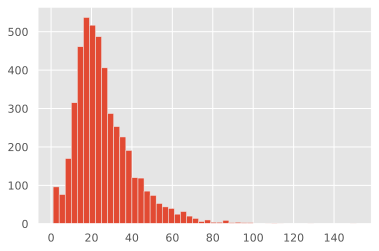

In [ ]:
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
#plt.xlabel('Sentence Distribution')
#plt.axvline()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


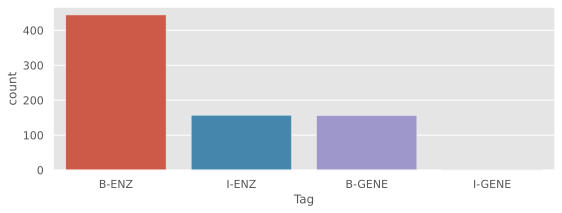

In [ ]:
plt.figure(figsize=(9, 3))
ax = sns.countplot('Tag', data=ad.loc[ad['Tag'] != 'O'], orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
#plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


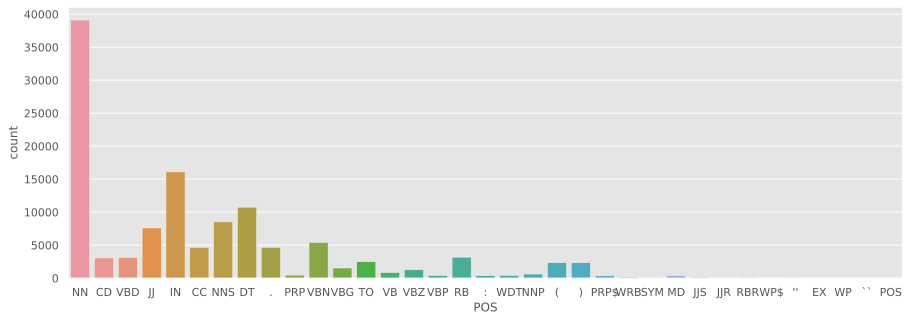

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('POS', data=ad, orient='V')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
#plt.tight_layout()
#plt.savefig('/content/pos.png') 
plt.show()

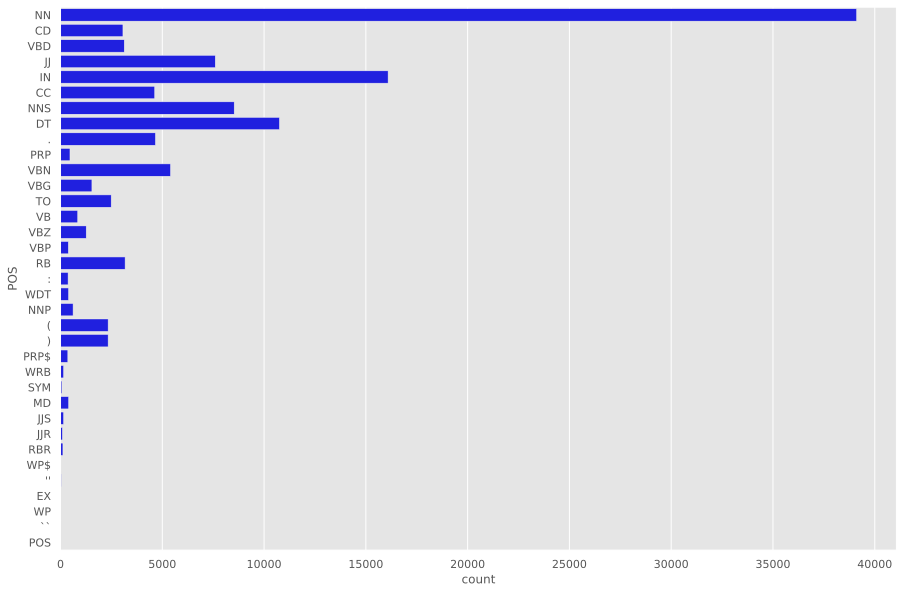

In [ ]:
plt.figure(figsize=(15, 10))
#ax = sns.countplot('POS', data=ad, orient='h')
fig = sns.countplot(y = 'POS', data = ad, color = 'blue')
plt.show()
figure = fig.get_figure()
figure.savefig('pos.png')



In [ ]:
words = open('/content/output.txt').read().lower().split()

# Get the set of unique words.
uniques = []
for word in words:
  if word not in uniques:
    uniques.append(word)

# Make a list of (count, unique) tuples.
counts = []
for unique in uniques:
  count = 0              # Initialize the count to zero.
  for word in words:     # Iterate over the words.
    if word == unique:   # Is this word equal to the current unique?
      count += 1         # If so, increment the count
  counts.append((count, unique))

counts.sort()            # Sorting the list puts the lowest counts first.
counts.reverse()         # Reverse it, putting the highest counts first.
# Print the ten words with the highest counts.
for i in range(min(10, len(counts))):
  count, word = counts[i]
  print('%s %d' % (word, count))

the 9643
of 7688
and 6014
in 4095
to 3040
was 2439
a 2214
with 1528
by 1458
were 1440


#Split manually according to the nearest sentence end.

In [ ]:
df_train = ad.loc[ad['Sentence #'] <= '3847']
df_train = ad.loc[ad['Sentence #'] <= '3847']
df_train.to_csv(f'/content/train.tsv', sep = '\t', header = False, index=False)
df_test = ad.loc[ad['Sentence #'] > "3847"]
df_test.to_csv(f'/content/test.tsv', sep = '\t', header = False, index=False)